# Principes de l'apprentissage de données



Inspiration: [The Elements Of Statistical Learning](https://www.amazon.fr/Elements-Statistical-Learning-Inference-Prediction/dp/0387848576/ref=asc_df_0387848576/?tag=googshopfr-21&linkCode=df0&hvadid=194880022724&hvpos=&hvnetw=g&hvrand=10078149059023390877&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9055953&hvtargid=pla-138220952235&psc=1)



## Variable aléatoire et réalisation

     
* Les variables aléatoires sont notées avec des majuscules ex : $X$ représente une donnée générale, pas encore observée. On ne connait pas sa valeur, mais on peut imaginer sa loi (= la proba qu'elle fasse ceci ou cela).
* Les constantes sont notées avec des minuscules  ex :  $x$   représente une donnée numérique, la réalisation d'un $X$.  
* On peut par exemple écrire $\mathbf P  [X=x]$.  
     

Il est parfois difficile de savoir quand il faut mettre une majuscule ou pas. Voici un exemple qui vous éclairera peut-être.


Exemple : Considérons un quartier dans lequel toutes les maisons sont identiques.  Notons $X_1,X_2,X_3...$ le prix des différentes maisons. Ces prix sont aléatoires car ils  dépendent des négociations futures entre acheteurs et vendeurs.  On suppose  de plus que la vente d'une maison n'influe pas sur la vente d'une autre.   Ainsi $X_1,X_2,...$ sont des "copies indépendantes" d'une même variable aléatoire $X$ (qui représente le prix "générique" d'une maison).    Supposons maintenant que les 10 premières maisons se sont  vendues.  Puisque la vente a eu lieu, ces prix ne sont plus aléatoires, on les notes avec des   petites lettres $x_1,x_2,...,x_{10}$.   L'espérance du prix générique $X$ peut-être estimée par la moyenne $\frac 1 {10} (x_1+...+x_{10})$.



Le héros de ce cours sera un couple aléatoire $(X,Y)$, avec le plus souvent $X\in \mathbb R^p $ et $Y\in \mathbb R$. Nous disposerons de copies indépendantes $(X_i,Y_i)$, que nous appellerons échantillon.  Et de temps en temps, nous considérerons des réalisations $(x_i,y_i)$ de $(X_i,Y_i)$ qui nous permettrons d'estimer des espérances : $\mathbf E[\phi(X,Y)] \simeq \frac 1 n \sum_{i=1}^n \phi(x_i,y_i)$.  




## Les principes de l'apprentissage


### Construire un estimateur $\hat f$ d'une fonction inconnue $f^?$


On considère des variables explicatives (=variables d'entrée=input=descripteurs) $X=(X^1,...,X^p)  \in \mathbb R^p$  (ex : la surface, le quartier, le nombre de pieces d'un appartement).

On considère une variable à expliquer (=variable de sortie=output=cible) $Y$ (ex: le prix d'un appartement).

On suppose l'existence  d'une relation $Y= f^?(X) + Bruit$.

On ne connait pas $f^?$, mais l'on  dispose d'observations  indépendantes     $X_i$ et $ Y_i = f^?(X_i)+Bruit_i$.


On va construire un estimateur $\hat f$ à partir des observations,  en espérant  in fine que  $\hat f$ et $f^?$ soient proches.   


<img src="https://github.com/vincentvigon/public/blob/main/data/functionApprox.png?raw=true" width="400">





### Deux objectifs


     
* Prévoir : on a  une entrée $x=(x^1,...,x^p)$ dont on ne connait pas la sortie correspondante. On la prédira avec $\hat f(x)$.
* Interpréter = comprendre l'influence des entrées sur la  sortie. Par exemple $X^1$=quantité de tabac consommé, $X^2$=quantité de lait consommé, $Y\in \{0;1\}$= avoir ou ne pas avoir un cancer du poumon.  Dans quelle mesure les entrées $X^1$ et  $X^2$ influencent la sortie $Y$ ?  
     




### Types de variables

2 types de variables :
     
* variable quantitative :  age, prix, surface, niveau de gris
* variable qualitative= categorielle, discrète, factors (anglais) : ex : sexe, région, catégorie d'age.
      


     
* la sortie $Y$ est  quantitative. On parle de  régression
* la sortie $Y$ est qualitative. On parle de     classification
      


Exemple MNIST    (Mixed National Institute of Standards and Technology  )
     
* Entrée quantitative : $X \in \mathbb R^{28\times 28}$ : une image en niveau de gris.  
* Sortie qualitative $Y \in \{0,1,2,3,4,5,6,7,8,9\}$ : les 10 chiffres possibles.
* Problème : associer à chaque image le chiffre correspondant. C'est de la regression/classification ?
     

<img src="https://github.com/vincentvigon/public/blob/main/data/digit.png?raw=true" width=400>



Exemple :  Prix d'une assurance.
     
* Entrées quantitatives : âge du conducteur, coefficient bonus-malus, prix du véhicule.   
* Et aussi des entrées qualitatives : sexe du conducteur, département, marque de véhicule.
* Sorties quantitatives : prix de la prime d'assurance.
* Problème : associé à chaque conducteur le tarif qu'il mérite. C'est de la regression/classification ?
     



## Construire et juger $\hat f$.



### Juger $\hat f$.

On sépare nos observations $(X_i,Y_i)$ en deux parties :

     
* Les données d'entrainement: $Train$, que nous utilisons pour construire $\hat f$.

* Les données de test : $Test$,   qui nous servent à juger le $\hat f$ qu'on vient de construire. Ce jugement se fait à l'aide d'une fonction de coût (= de perte=Loss)
$$
Loss_{Test} =\sum_{i \in Test} \text{dist}(Y_i, \hat f(X_i))\qquad    
$$
  avec par exemple   $\text{dist}(a,b) = (a-b)^2$

Si $Loss$ est petit, on a gagné !

On verra d'autres exemples de $Loss$. En particulier, quand $Y$ est qualitative (ex: un numéro de département), on ne peut plus utiliser $\text{dist}(a,b) = (a-b)^2$.




### Construire $\hat f$ en minimisant un $Loss_{Train}$


Puisque l'estimateur est jugé avec une fonction coût, pourquoi utiliser cette même fonction pour construire l'estimateur !

On se donne une famille de fonction $\mathbb F$ possible et on pose :
$$
\hat f  =     \text{argmin} _{f \in \mathbb F} Loss_{Train} =   \text{argmin} _{f \in \mathbb F}  \sum_{ i\in Train} \text{dist}(Y_i, f(X_i))
$$
Mais attention, pour définir ce $Loss_{train}$, nous n'avons pas utilisé les même données $(X_i,Y_i)$ que pour $Loss_{Test} $.   Car il ne faut pas être juge et parti !

On peut aussi vouloir expressément que $\hat f$ soit régulière en mettant une pénalité sur les $f$ irréguliers. Par exemple :
$$
\hat f  =\text{argmin}_{f \in \mathbb F}  \Big(  \   \  \sum_{ i \in Train} \text{dist}(Y_i, f(X_i))+ \lambda Penalisation( f )\Big)
$$
où la $Penalisation$ associe aux fonctions "compliquée" une valeur importante. Ainsi, quand on minimise le terme ci-dessus, on doit faire un compromis entre "coller aux données train" et "garder un modèle simple".



Souvent l'ensemble de fonctions possibles $\mathbb F$ est décrit à l'aide de paramètres. On parle alors de modèle paramétrique. Par exemple
$$
\mathbb F= \{    f(x) = \theta_0 + \theta_1 x  :  \theta \in \Theta = \mathbb R^2  \}
$$
Lorsque l'on a paramétré $\mathbb F=\{f_\theta : \theta \in \Theta \}$,   la formule d'optimisation se décompose ainsi
\begin{equation}
\hat f  = f_{\hat \theta}  \qquad \text{avec }   \hat \theta =\text{argmin} _{\theta \in \Theta}  \sum_{i\in Train} \text{dist}(Y_i,  f_\theta(X_i))
\end{equation}






### Construire $\hat f$ sans minimiser de $Loss_{Train}$

La technique des $k$ plus proches voisins :

    |
    | o
    |                          o
    |              o
    |          o      
    |
    __x________x___x__?_________x__





$$
\hat f (x) = \frac 1 k  \sum_{i: X_i   \in  V_k(x)  }   Y_i
$$
où $V_k$ est le voisinage de $x$ constitué des $k$ plus proches $X_i$ dans $Train$. C'est une technique   non-paramètrique  (on n'a même pas décrit l'ensemble des fonctions possibles $\mathbb F$).  


<img src="https://github.com/vincentvigon/public/blob/main/data/knn.png?raw=true" width=400>






La technique des noyaux. On se donne un noyau $N(x,y)$, par exemple $N(x,y) = e^{ -\frac 12   {(\frac {x-y}{\sigma})^2}}$, avec $\sigma>0$ une constante.  Puis
$$
\hat f(x) = \frac{ \sum_{Train } N(x,X_i) Y_i  }{ \sum_{Train } N(x,X_i)  }
$$
On reconnait là les techniques d'interpolation, et de lissage.




### Qu'est-ce que la modélisation

Modéliser signifie  faire un pari, (= faire des hypothèses) sur $f^?$, sur le bruit, ou plus généralement sur la loi jointe de $(X,Y)$.  Ce pari peut être fondé sur notre connaissance du problème (avis d'expert), ou bien sur  l'observation des données (statistiques descriptives).  Cette modélisation  conduit naturellement à choisir une technique pour construire $\hat f$.


Exemple : Il est naturel de supposer une relation affine entre le prix d'un appartement $Y$ et sa surface $X$.  Donc
 $Y =  w^?_0+ w^?_1 X + Bruit$.  Ce qui nous conduit à l'estimateur suivant :

$$
\hat f (x) = \hat w_0 + \hat w_1 x
$$
avec
$$(\hat w_0,\hat w_1)= \text{argmin} _{(w_0,w_1)  \in \mathbb R^2}  \sum_{Train}  ( w_0+w_1X_i - Y_i )^2
$$

La modélisation peut aller plus loin : on peut parier que $Bruit$ est une v.a. Gaussienne centrée de variance $\sigma^2$. Cette hypothèse supplémentaire permet de calculer des intervalles de confiance, de faire des tests etc.


Ainsi, la regression linéaire (qu'on verra en détail plus loin) revient à parier que les données sont disposée selon une droite, un plan, un hyperplan...


Par contre,  quand on utilise la technique des plus proches voisins, avec $k=1$ petit,
$$
\hat f (x) =    Y_i  \text{ avec $X_i$ le plus proche de $x$}
$$
 on parie plutôt que la fonction $f^?$ est localement constante. Ainsi $f^?(x)$ est  proches des $f^?(x_i)$ pour $x_i$ voisins de $x$.  



### Sélection de modèle



Une technique plus avancée consiste à choisir plusieurs modèles, ce qui conduit à plusieurs estimateurs $(\hat f_1,\hat f_2, ...)$, puis il faut choisir le meilleur.   Pour faire marcher cette technique, nous devons séparer nos observations $(X_i,Y_i)$ en trois parties: $Train$, $Validation$, $Test$.

     

* $Train$ sert à construire les estimateurs $(\hat f_1,\hat f_2, ...)$. Par exemple, on se donne plusieurs ensembles de fonctions $\mathbb F_1,\mathbb F_2, ...$ et plusieurs constantes $\lambda_1, \lambda_2,...$.
$$
\hat f_k = \text{argmin} _{f\in \mathbb F_k} \Big(   \sum_{Train} \text{dist}( f(X_i) ,Y_i  )  + \lambda_k \, penalisation(f)\Big)
$$
* $Validation$ sert à sélectionner le bon estimateur $\hat f_k$.
$$
\hat f = \hat f_{\hat k} \qquad \text{avec }  \hat k = \text{argmin} _{k} \sum_{Validation} \text{dist} (\hat f_k(X_i), Y_i  )
$$

* $Test$ sert à tester si notre modèle final est bon à l'aide du critère :
$$
\sum_{Test} \text{dist} (\hat f(X_i),Y_i )
$$


# Regression Linéaire

## Regression linéaire simple

### Le modèle

   
*  $p$-Entrées (= descripteur) quantitives : $X=(X^1,...,X^p)\in \mathbb R^p$.
* Une sortie quantitative : $Y \in \mathbb R$.
     


Nous parions que $Y$ est proche d'une combinaison affine des $X^j$.    On se donne une famille paramétrée
$$
\mathbb F = \Big\{f_w( x )=     w_0 + \sum_{j=1}^p  w_j x^j \ : \ w\in \mathbb R^{p+1}   \Big\}    
$$
On cherche le meilleur dans cette famille :
$$
\hat f= f_{\hat w}   , \qquad \text{avec } \hat w = \text{argmin} _{w}    \sum_{i\in Train}  \Big(  Y_i  - f_w( X_i ) \Big)^2    = \text{argmin} _{w}  Loss(w)
$$


<img src="https://github.com/vincentvigon/public/blob/main/data/linearRegression.png?raw=true" width=400>



Il y a deux techniques pour trouver $\hat w$.
     
* En minimisant $w\to Loss(w)$ par une méthode de gradient.
* Par un calcul direct que nous détaillons dans la prochaine section.
     



  
### Calcul direct de $\hat w$


On pose $\mathbf{X}=\mathbf{X}_{train}$ la matrice dont la colonne 0  est constituée de $1$, et dont les autres colonnes sont données par  $\mathbf{X}_{ij} = X^j_i$ ($i$ est l'indice qui fait parcourir $Train$ et $j$ est l'indice des différentes variables explicatives).  On pose $\mathbf{Y}$ la matrice colonne telle que $\mathbf{Y}_i=Y_i$. On considère $w=(w_0,w_1,...,w_p)$ comme une matrice colonne.



Exprimons $Loss$ avec des multiplications matricielles :
\begin{alignat*}{1}
Loss(w) 	&= \sum_{i}  \Big(  Y_i    -  f_w( X_i ) \Big)^2\\
		&= \sum_{i}  \Big(  Y_i    - \sum_j X_{i}^j w_j ) \Big)^2\\
		&=   (\mathbf Y - \mathbf X w)^T\, ( \mathbf{Y} - \mathbf X w)  \\
		&=   \mathbf Y^T \mathbf Y  - \mathbf Y^T  \mathbf X w    -  w^T\mathbf X^T \mathbf Y + w^T\mathbf X^T \mathbf X w
\end{alignat*}
Pour trouver le minimum de cette fonction  convexe, on calcule sa différentielle (cf. annexe) :
\begin{alignat*}{1}
d Loss(w) &= - 2 \mathbf Y^T  \mathbf X + 2 w^T\mathbf X^T \mathbf X
\end{alignat*}
Cette différentielle s'annule lorsque :
$$
w^T \mathbf X^T\mathbf   X =  \mathbf Y^T \mathbf X  \Leftrightarrow  \mathbf X^T\mathbf  X w =    \mathbf X^T \mathbf Y \Leftrightarrow  w= (\mathbf X^T \mathbf X)^{-1} \mathbf X^T \mathbf Y   
$$

Conclusion :
$$
\hat w = \text{argmin} _w Loss(w) = (\mathbf X^T \mathbf X)^{-1} \mathbf X^T \mathbf Y   
$$
Et donc l'estimation est donnée par
$$
 \hat{ \mathbf {Y}} =   \mathbf X \hat w =     \mathbf X (\mathbf X^T \mathbf X)^{-1} \mathbf X^T \mathbf Y
$$
Rappelons que $\mathbf X= \mathbf X_{train}$ est formée de donnée train. Donc l'estimation ci-dessus est sur les données train. Maintenant, si l'on dispose de descripteurs  $test$ que l'on met dans une matrice  $\mathbf X_{test}$.   On prédit l'output correspondant par  
$$
 \hat{ \mathbf {Y}}_{test} =   \mathbf X_{test} \hat w =     \mathbf X_{test} (\mathbf X^T \mathbf X)^{-1} \mathbf X^T \mathbf Y
$$



### Unicité du minimum ?


Nous somme aller trop vite précédemment. Y-a-il unicité du minimum de la loss ?

En revenant sur les calculs, on voit que l'endroit (les endroits ?) où la différencielle s'annule est l'ensemble des $w$ tels que:
$$
 \mathbf X^T\mathbf  X w =    \mathbf X^T \mathbf Y    
$$
Cette équation linéaire admet une unique solution ssi la matrice $\mathbf X^T\mathbf  X$ est inversible, ce qui équivaut à dire que le rang de  $\mathbf  X$ est égal à la dimension de $\mathbf X^T\mathbf  X$ que nous notons $n$. Ce qui équivaut à dire que  $\mathbf  X$ a plus de lignes que de colonnes, et que ces colonnes sont linéairement indépendants.

Résumons: Notons $I$ le nombre d'observation (d'individus). Notons $J$ le nombre de "vraies" variables descriptive (vrai=linéairement indépendantes).

Il y a unicité du $w$ minimisant la mse entre $Y$ et $(Xw+b)$ ssi $I\geq J+1$.



Remarque: Tout ce que l'on vient de dire reste valable quand la dimension de l'output $Y$ est plus grande que $1$. Le critère d'unicité ne fait pas intervenir cette dimension.

## Pénalisation (shrinkage)



### Ridge


Il arrive souvent que les variables explicatives $X^1,...,X^p$ soient corrélées. Par exemple  pour une maison  
     
* variables corrélées : $X^1 =$ surface, $X^2=$nombre de pièces.
* variables très corrélées : $X^1 =$ surface totale, $X^2=$ surface habitable.
     

Ces corrélations créent des problèmes : Avec la méthode directe, la matrice $\mathbf{X}^T \mathbf{X}$ peut-être difficile à inverser (on dit qu'elle est mal conditionnée).  Avec la méthode du gradient : le minimum de $Loss$ peut-être atteint (ou presque atteint) pour de nombreux $w$.  

Par exemple, considérons deux variables quasi égaux $X^1\simeq  X^2$
$$
Loss(w)= \sum_{Train} \Big(w_0 +w_1 X^1_i + w_2 X^2_i - Y_i \Big)^2 \simeq   \sum_{Train} \Big(w_0 + (w_1+w_2) X^1_i  - Y_i \Big)^2
$$
Ainsi, seule la somme des paramètres $w_1,w_2$ compte dans $Loss$.   Ainsi, en fonction de l'initialisation, l'algorithme de la descente du gradient peut donner $w_1=1001, w_2=-1000$ aussi bien que $w_1 = 1,w_2=0$.  

Pour réduire cette instabilité, on rajoute une pénalisation :
$$
Loss_\alpha (w) = \sum_{i \in Train}  \Big(  y_i -  w_0  -  \sum_j w_j X^j_i    \Big)^2 +  \alpha  \sum_{j>0} (w_j) ^2
$$
Ainsi la descente du gradient préférera toujours $w_1 = 1,w_2=0$ à $w_1=1001, w_2=-1000$, et si l'on prend $\alpha$ assez petit, le premier terme de $Loss_\alpha$ sera, lui aussi, minimisé.   


***A vous:*** Ré-exprimer $Loss_\alpha$ en terme matricielle.  Montez que la solution qui minimise cette loss est:
$$
\hat w =  (\mathbf X^T \mathbf X + \alpha I )^{-1} \mathbf X^T \mathbf Y   
$$




### Lasso

On peut aussi utiliser la fonction  
$$
Loss_\alpha(w) = \sum_{i \in Train}  \Big(  y_i  -  \sum_j w_j X^j_i    \Big)^2 +  \alpha   \sum_{j>0} | w_j |
$$
Le terme $ \sum_j | w_j | $   pénalise même les petits $w_j$  et les pousse à devenir $0$.   Ainsi le $\hat w$ calculé  aura peu de $\hat w_j \neq 0$ ce qui le rend facile à interpréter ; les variables explicatives peu utiles ont été évacuées.  





### Ridge et PCA: même combat

Ecrivons la décomposition SVD de $X$.
\begin{align*}
X &= V S W \\
X^T& = W^T S^T V^T
\end{align*}
On note $S^2$ la matrice carré avec les valeurs singulières au carré sur la diagonale.
\begin{align*}
X^TX+\alpha I&= W^T(S^2+ \alpha I)W \\
(X^T X+\alpha I)^ {-1}&= W^T(S^2+\alpha I)^{-1}W
\end{align*}
\begin{align*}
(X^T X+\alpha I)^ {-1} X^T Y &= W^T(S^2+\alpha I)^{-1} S^TV^T Y \\
\hat Y_i =  X (X^T X+\alpha I)^ {-1} X^T Y &= V S (S^2+\alpha I)^{-1} S^TV^T Y
\end{align*}

Notons $p$ le nombre de colonnes de $X$ est $N$ le nombre de lignes. Détaillons le calcul précédent:
$$
\hat Y_i = \sum_{j=1}^p \sum_{n=1}^N V_{ij} \frac {s_j^2}{s_j^2+\alpha} V_{nj}Y_n
$$
Analysons: Augmenter $\alpha$ désavantage les petites valeurs de $s_j$.


Maintenant fixons la pénalité: $\alpha=1$. Mais effectuons une PCA: il s'agit de choisir $d<p$ puis d'annuler toutes les petites valeurs propres $s_j$ pour $j\in\{d+1,....,p\}$, ainsi l'estimation est :
$$
\hat Y_i = \sum_{j=1}^d \sum_{n=1}^N V_{ij} \frac {s_j^2}{s_j^2+1} V_{nj}Y_n
$$



## Augmentation / transformation des inputs


On dispose toujours de variables descriptives: $X=(X^1,X^2,...)$.  On peut alors décider de rajouter des nouvelles variables descriptives $\phi^1(X),\phi^2(X),...$.

Par exemple:  on veut expliquer le cout d'un appartement $Y$ à partir de:
* $X^1$ = surface
* $X^2$ = charges variables (chauffage, eaux, ... )
* $X^3$ = charges fixes (menage, ascenseur, ...)
* $X^4$ = ensoleillement (en lumen)
* $X^5\in {0,1}$  = quartier populaire si 0,  chic si 1

On peut naturellement ajouter
* $\phi^1(X) = X^2+X^3 $ : représentant les charges totales
* $\phi^2(X) = X^1/ \phi^1(X) $ : le rapport surface / charges totales
* $\phi^3(X) = X^1X^4X^5$ : le produit surface * ensoleillement quand le quartier est chic
* $\phi^4(X) = X^1X^4(1-X^5)$: le produit surface * ensoleillement quand le quartier est populaire
  

Ensuite, on fait de la régression classique en ajoutant les nouvelles variables, on considère donc le modèle:
$$
f_{w}( x )=     w_0 + \sum_j  w_j x^j+ \sum_k  w_k \phi^k(x)
$$

Là encore, on a intérêt à minimiser le nombre de $w_j$ non nul, en imposant des pénalisations, ou tout simplement en supprimant les $\hat w_j$ tels que $ \hat w_j X^j$ est "très petit". Dans le modèle linéaire,  on dispose d'un teste pour savoir si l'influence d'un coefficient est négligeable ou pas (cf. TP de modèle aléatoire).

Il est tout à fait possible que les nouvelles variables que l'on a introduite aient plus d'influence que les variables initiales.





# Biais et Variance

## Biais-Variance


### Un exemple de modèle linéaire avec transformation des input

Considérons un input $X \in [0,1]$ quantitatif et un output $Y\in \mathbb R$ quantitatif. Considérons `freqMax` un paramètre. On définit le modèle suivant :
\begin{alignat*}{1}
Y &= w_0 + \sum_{n=1}^{\mathtt{freqMax}}  w_{2n}  \cos(2 \pi n X) +  w_{2n-1}  \sin(2 \pi n X) \\
&= f_w(X)
\end{alignat*}

Plus `freqMax` est grand, et plus on a de chance de trouver un $\hat w$ telle que
$$
f_{\hat w} \simeq f^{?}
$$
Mais, est-il toujours souhaitable de prendre un `freqMax`  très grand ?




### Flexibilité d'un modèle

Nous définissons la flexibilité d'un modèle par des exemples.

     

* un modèle linéaire pure et simple est très peu flexible.  Il ne s'adapte qu'à des données  proches d'un hyper-plan.

* Le modèle SinCos avec `freqMax`$=30$ est très flexible.

* quand $\hat f$ est obtenu en minimisant
$$
\hat f = \text{argmin} _{f\in \mathbb F }    \sum_{Train} \text{dist} ( f(X_i) - Y_i )   + \lambda \, Penalisation(f)
$$
Plus $\mathbb F$ est grand et plus le modèle est flexible.

Plus $\lambda $ est grand, plus on oblige le modèle a avoir des fonctions régulières, et moins le modèle est flexible.

* la technique des $k$-plus proches voisins
$$
\hat f (x) = \frac 1 k  \sum_{X_i   \in  V_k(x)  }   Y_i
$$
est très flexible quand $k=1$, et peu  flexible quand $k$ est grand.  Cas extrême : si $k$ est égal au nombre de données dans $Train$, $\hat f$ sera une fonction constante, partout égale à la moyenne des $Y_i$ : aucune flexibilité.

* Quand  $\hat f$ est obtenue avec des noyaux gaussiens :
$$
\hat f(x) = \frac{ \sum_{Train } N(x,X_i) Y_i  }{ \sum_{Train } N(x,X_i)  }, \qquad N_{\sigma}(x,y) = e^{ - \frac 1 2   \big(\frac{ x-y}{\sigma}\big)^2 }
$$
Plus $\sigma$ est grand, plus la fonction $y\to  N_{\sigma}(x,y) $ s'étale autour de $x$, et moins le modèle est flexible.

* De manière générale, plus un modèle s'adapte localement aux données, et plus il est flexible.

* Plus un modèle est flexible, plus il est complexe et moins il est interprétable.

     





### Sur-apprentissage

Observons notre modèle sin-cos pour différents `freqMax`. On dispose de données $Train$ avec lesquelles on entraine le modèle (= on calcule $\hat w$) et on dispose de données $Test$ très nombreuses qui nous permettent de juger ce modèle.

<img src="https://github.com/vincentvigon/public/blob/main/data/freqMax2.png?raw=true" width=600>
<img src="https://github.com/vincentvigon/public/blob/main/data/freqMax4.png?raw=true" width=600>
<img src="https://github.com/vincentvigon/public/blob/main/data/freqMax6.png?raw=true" width=600>
<img src="https://github.com/vincentvigon/public/blob/main/data/freqMax12.png?raw=true" width=600>


On remarque que plus $\nu$ est grand et plus l'estimation colle à $Train$, mais plus elle s'éloigne de $Test$ par endroit.
Le modèle a appris par cœur les données $Train$, et du coup, il est mauvais pour estimer des données $Test$. Il y a eu sur-apprentissage.

On dit aussi qu'un modèle qui a sur-appris (des données $Train$), n'est pas **généralisable** (sur des données $Test$)



### Biais-Variance



Ainsi, un modèle flexible  a une forte "probabilité" de s'éloigner de $Test$.    Insistons sur le mot "probabilité". En effet, la fonction apprise   $\hat f $    dépend de l'échantillon d'apprentissage $Train$ qui est aléatoire.  Pour montrer cette dépendance, par la suite, nous noterons $T_r=Train$ et $\hat f_{T_r} = \hat f$ (la fonction d'estimation construite à partir de $T_r$).

Avec `freqMax`$=30$, la fonction $\hat f_{Tr}$ est très sensible aux variations de  $T_r$. À l'inverse avec `freqMax`$=1$, $\hat f_{Tr}$ sera quasi identique d'un tirage à l'autre de $T_r$.     On dit qu'un  modèle  flexible, a une grande "variance".

<img src="https://github.com/vincentvigon/public/blob/main/data/biaisVarianceSchema.png?raw=true" width=600>




### Quantifions


Considérons un $x$ et sa prédiction $\hat f_{T_r}(x)$. L'erreur quadratique  pour l'observation $(x,y)$ se décompose comme ceci :  
$$
 \mathbf E \Big[\Big(  \hat f_{T_r}(x)  - y \Big)^2\Big] \\
= { \mathbf E\Big[ \Big(  \hat f_{T_r}(x)  -  \mathbf E[ \hat f_{T_r}(x)]  \Big )^2\Big]}   \ \  + \  \      { \Big(  \mathbf E[ \hat f_{T_r}(x)  ]-    y \Big)^2 }  \\
= \text{variance}+\text{biais}
$$
(la seule chose aléatoire ci-dessus c'est $T_r$)

Le premier terme s'appelle la variance  en $(x,y)$, le second terme s'appelle le biais de en $(x,y)$.   













Démonstration. Pour aléger, nous notons $\mu=\mathbf E[ \hat f_{T_r}(x)  ]$
\begin{align}
&=    \mathbf E \Big[\big(  \hat f_{T_r}(x)  -  \mu +  \mu-    y \big)^2\Big]  \\
&=    \mathbf E \Big[\big(  \hat f_{T_r}(x)  -  \mu \Big)^2\Big] +  \mathbf E \Big[\big(\mu-    y \big)^2\Big]  
+2\mathbf E \Big[\big(  \hat f_{T_r}(x)  -  \mu\big)\big(\mu-    y \big)\Big]\\
&=    \mathbf E \Big[\big(  \hat f_{T_r}(x)  -  \mu \Big)^2\Big] +  \big(\mu-    y \big)^2
+2\mathbf E \Big[\big(  \hat f_{T_r}(x)  -  \mu\big)\Big]\big(\mu-    y \big) \\
&=    \mathbf E \Big[\big(  \hat f_{T_r}(x)  -  \mu \Big)^2\Big] +  \big(\mu-    y \big)^2  
+2\big(  \mu  -  \mu\big)\Big]\big(\mu-    y \big) \\
&= \mathbf V[\hat f_{T_r}(x) ] +   \big(\mu-    y \big)^2   + 0
\end{align}
$\square$



Mais il est plus naturel d'estimer une erreur quadratique (moyenne), une variance (moyenne) et un biais (moyen) (en général on omet l'adjectif "moyen), ce qui revient à intégrer sur tous les $x,y$ :
\begin{alignat*}{1}
&\int  \mathbf E \Big(  \hat f_{T_r}(x)  - y \Big)^2    \, \mathbf P[X\in dx, Y\in dy ]  \\
&=  \ \   \int  \mathbf E \Big(  \hat f_{T_r}(x)  -  \mathbf E[ \hat f_{T_r}(x)]  \Big )^2 \, \mathbf P[X\in dx]   \\
& + \  \   \int   \Big(  \mathbf E[ \hat f_{T_r}(x)  ]-    y \Big)^2    \, \mathbf P[X\in dx,Y\in dy]\\
\end{alignat*}
En plus court:
\begin{alignat*}{1}
\mathbf E \Big[\Big(  \hat f_{T_r}(X)  - Y \Big)^2\Big]  &=  
\mathbf E \Big[ \Big(  \hat f_{T_r}(X)  -  \mathbf E[ \hat f_{T_r}(X)]  \Big )^2\Big]   \ \
 + \  \     \mathbf E\Big[\Big(  \mathbf E[ \hat f_{T_r}(X)  ]-    Y  \Big)^2\Big]   \\
\end{alignat*}

(Cette dernière formule est difficile à comprendre car l'espérance porte sur plusieurs niveaux d'aléatoire)

### Avec des courbes

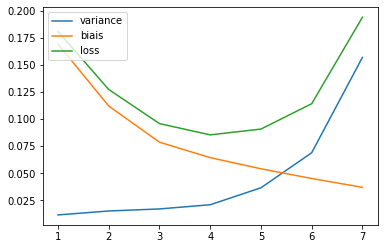

Dans le TP, on reproduira ces courbes.

***Remarque:*** En abscisse il y l'hyper-paramètre `freqMax` qui gère la flexibilité de notre modèle. Mais on pourrait obtenir ce genre de courbe avec plein d'autres hyper-paramètre sur plein d'autres modèles. Ex:
* Le nombre de couche d'un réseau de neurone
* Le nombre de neurone par couche
* le paramètre k du k-plus proche voisin (sauf qu'il faudrait inverser l'ordre des abscisses)
* Et même pour les modèles qui sont long à entrainer: le temps d'apprentissage. Plus on y passe du temps, et plus le modèle "sur-apprend".

## Annexe


### Différentielle

Soit $f : \mathbb R^p \to \mathbb  R, w\to f(w) $.  

***Définition:*** La différentielle de $f$    en $w$ est l'application linéaire $\ell : \mathbb R^p \to \mathbb R$ telle que
$$
f(w+\epsilon) = f(w) + \ell(\epsilon) + o(\epsilon)
$$

Faites les deux exercices suivant en utilisant directement la définition ci-dessus de la différentielle. C'est très facile et cela aide à comprendre.

***exo***
      
 * Soit $S$ une matrice symétrique, vérifiez que la différentielle en $w$  de l'application $f(w) =  w^T S w$ est  :  
$$
\ell(\epsilon) =  2 w^T S \epsilon
$$

* Soit $A$ une matrice ligne. Vérifiez que la différentielle en $w$ de $f(w) = Aw$ est donnée par :
$$
\ell(\epsilon) = A\epsilon
$$
     




Notons $L$ la matrice ligne associée à $\ell$  c.-à-d.  $\ell(\epsilon) = L\epsilon$.  La différentielle $\ell $ de $f$  se calcule en général via la formule :
$$
L= [  \frac {\partial f }{\partial w_1} , ..., \frac {\partial f }{\partial w_p} ]
$$



### Hessienne


  La matrice Hessienne $H$ de $f$ en $w$ est la matrice qui vérifie (en notant $L$ la matrice colonne de la différentielle) :  
$$
f(w+\epsilon) =  f(w) +  L \epsilon +   \epsilon^T H \epsilon +  o(\| \epsilon \|^2)
$$
Vous en déduirez facilement que la matrice hessienne de $f(w) =  w^T S w$ est tout simplement ...

La matrice hessienne se calcule aussi avec les dérivées croisées : $H_{ij}= \frac {\partial^2 f}{\partial w_i  \partial w_j}$.


***À vous:***  Appliquer la méthode de Newton sur la loss du modèle linéaire. Que constatez-vous ?


